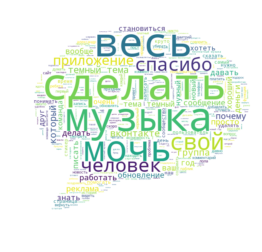

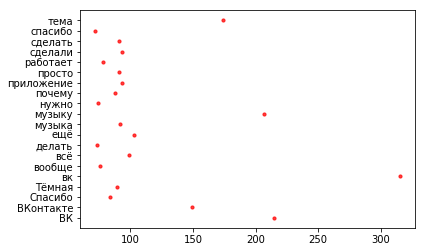

Топ 20 слов {'спасибо': 72, 'делать': 73, 'нужно': 74, 'вообще': 76, 'работает': 78, 'Спасибо': 84, 'почему': 88, 'Тёмная': 89, 'просто': 91, 'сделать': 91, 'музыка': 92, 'приложение': 93, 'сделали': 93, 'всё': 99, 'ещё': 103, 'ВКонтакте': 149, 'тема': 174, 'музыку': 207, 'ВК': 215, 'вк': 315}


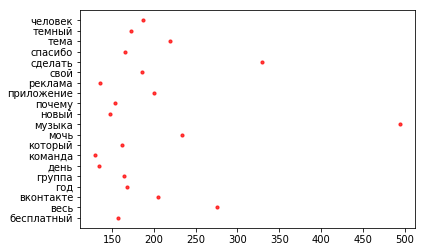

Топ 20 лемматизированных слов:  {'команда': 130, 'день': 134, 'реклама': 136, 'новый': 147, 'почему': 153, 'бесплатный': 157, 'который': 162, 'группа': 164, 'спасибо': 166, 'год': 168, 'темный': 173, 'свой': 186, 'человек': 187, 'приложение': 200, 'вконтакте': 205, 'тема': 219, 'мочь': 234, 'весь': 276, 'сделать': 329, 'музыка': 494}


In [9]:
from collections import Counter
from nltk.corpus import stopwords
import re
import operator
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

sw = stopwords.words('russian')             #русские стоп-слова
sw.append('это')
sw1 = []
for x in sw:
    sw1.append(x.title())
    
plain = []
mystem = []

with open('corpus\plain_texts.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    text = re.sub(r'\n', r' ', text)
    text = re.sub(r'[^а-яА-ЯёЁ ]', '', text)
    for word in text.split(' '):
            if word not in sw:
                if word not in sw1:
                    if len(word) > 1:
                        plain.append(word)
c = Counter(plain)
x = dict(c)
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
top_plain = dict(sorted_x[-20:])
            
        
    
with open ('corpus\lemmatized_texts.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    for word in text.split(' '):
            if word not in sw:
                if word not in sw1:
                    if len(word) > 1:
                        mystem.append(word)
c = Counter(mystem)
x = dict(c)
sorted_x = sorted(x.items(), key=operator.itemgetter(1))
top_lemmatized = dict(sorted_x[-20:])

#print(top_plain)                                 #ТОП 20 СЛОВ
#print(top_lemmatized)                            #ТОП 20 ЛЕММАТИЗИРОВАННЫХ СЛОВ



#ПОПРОБУЕМ СДЕЛАТЬ ОБЛАКО
text = str(' '.join(mystem))
comment_mask = np.array(Image.open("comment.jpg"))
cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)
cloud.generate(text)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
cloud.to_file("post_cloud.png")






def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):
    _, ax = plt.subplots()

    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()

#ГРАФИК PLAIN ТЕКСТОВ
x_data = [v for k,v in top_plain.items()]
y_data = [k for k,v in top_plain.items()]
x_label="Сколько раз слово встретилось в корпусе"
y_label="Топ частотных слов"
title="Топ 20 слов"
scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False)
print('Топ 20 слов', top_plain)                                 #ТОП 20 СЛОВ


#ГРАФИК ЛЕММАТИЗИРОВАННЫХ ТЕКСТОВ ТЕКСТОВ
x_data = [v for k,v in top_lemmatized.items()]
y_data = [k for k,v in top_lemmatized.items()]
x_label="Сколько раз слово встретилось в корпусе"
y_label="Топ частотных лемматизированных слов"
title="Топ 20 лемматизированных слов"
scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False)
print('Топ 20 лемматизированных слов: ', top_lemmatized)       #ТОП 20 ЛЕММАТИЗИРОВАННЫХ СЛОВ



#я не знаю, почему подписи осей и название не печатает((((((((((